# Zanin's time series

In [1]:
from train_test_utils import LossDistribution

## Logistic map

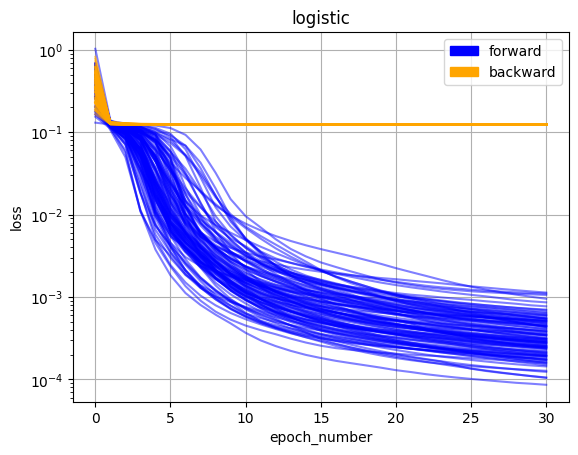

In [2]:
l = LossDistribution("20230626_distributions/logistic.json")
l.plot_learning_curves()

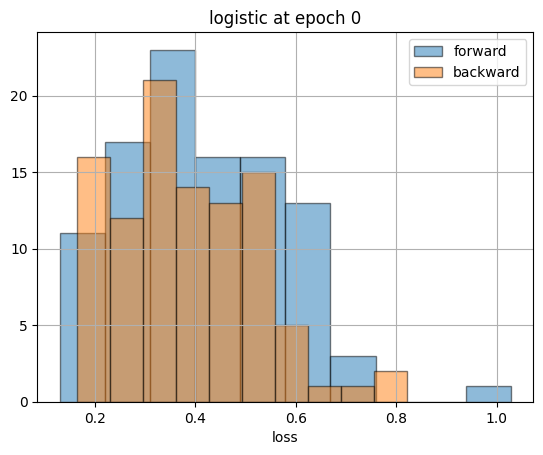

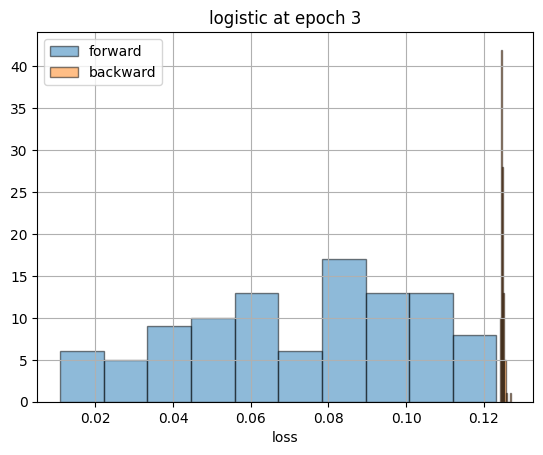

In [3]:
l.plot_distribution_at_epoch(0)
l.plot_distribution_at_epoch(3)

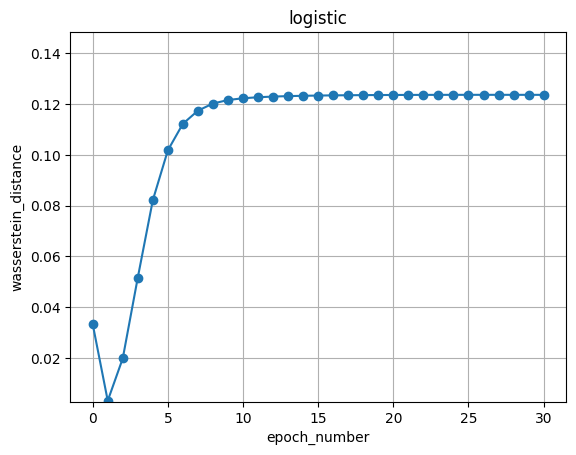

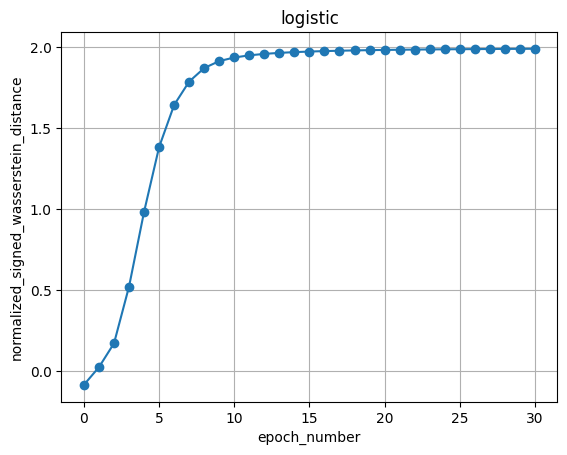

In [4]:
l.plot_wasserstein_vs_epoch()
l.plot_normalized_signed_wasserstein_vs_epoch()

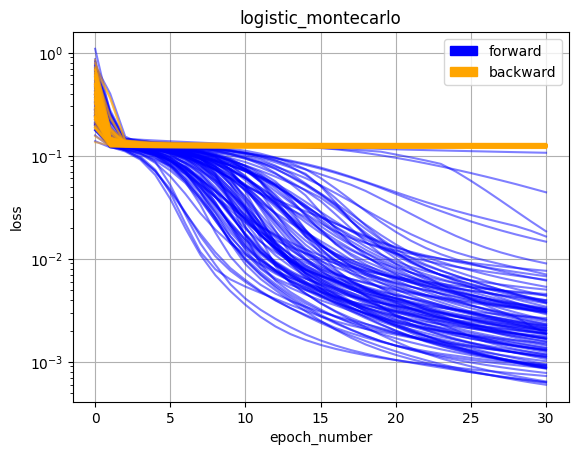

In [5]:
l = LossDistribution("20230626_distributions/logistic_montecarlo.json")
l.plot_learning_curves()

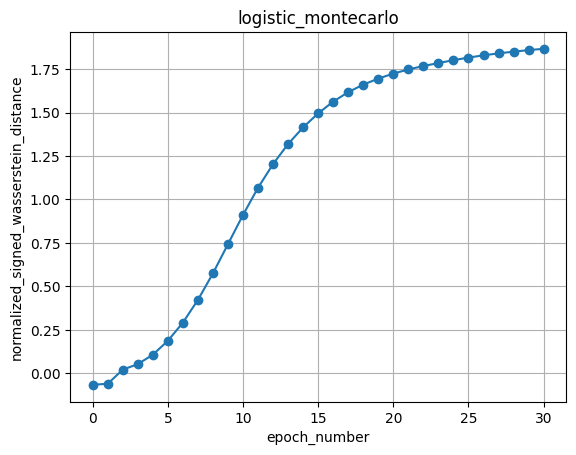

In [6]:
# l.plot_wasserstein_vs_epoch()
l.plot_normalized_signed_wasserstein_vs_epoch()

## Henon map

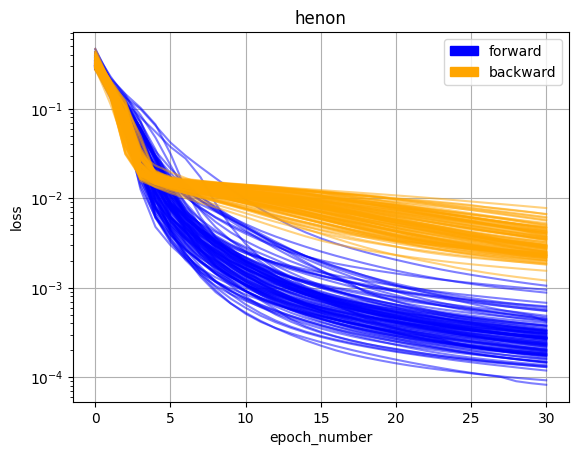

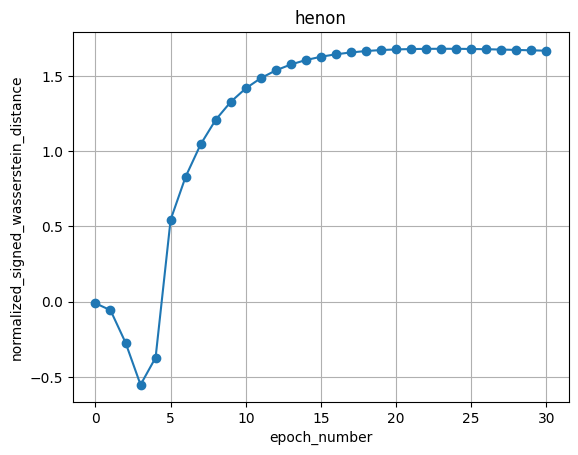

In [7]:
l = LossDistribution("20230626_distributions/henon.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

In [8]:
l = LossDistribution("20230626_distributions/henon_montecarlo.json")

# Drop NaN values
mask = ~np.isnan(l.forward).any(axis=1)
l.forward = l.forward[mask]
l.backward = l.backward[mask]
assert not np.isnan(l.forward).any()
assert not np.isnan(l.forward).any()
l.num_runs = len(l.forward)

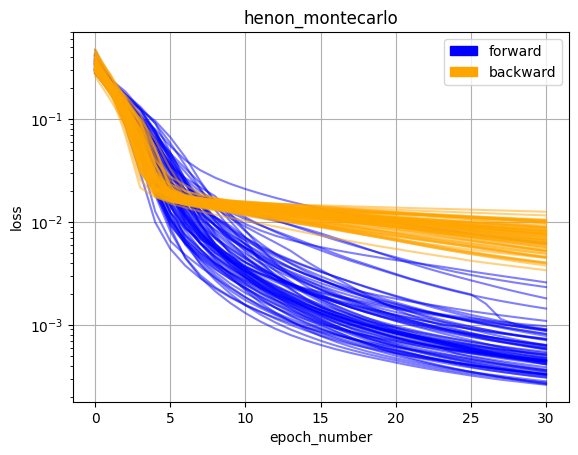

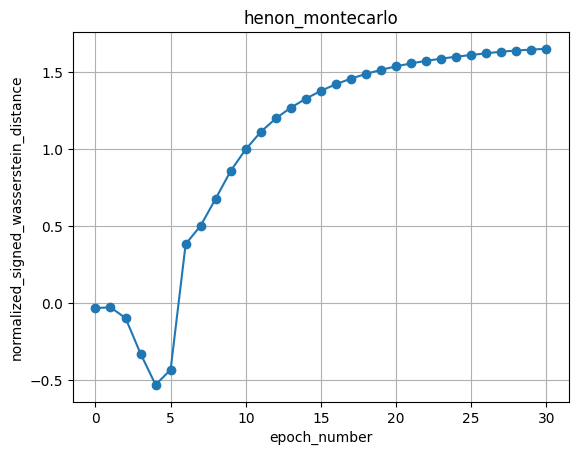

In [9]:
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

## Arnold's Cat map

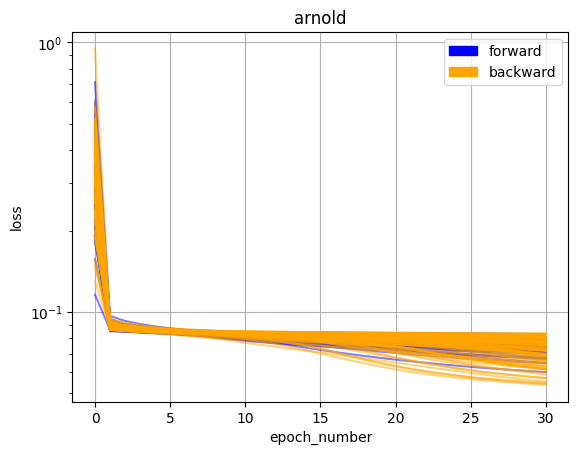

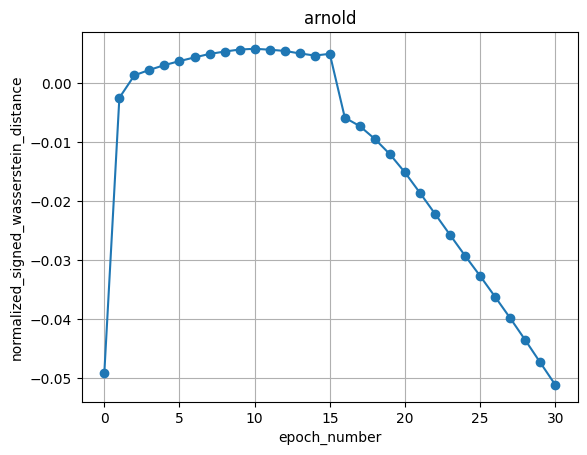

In [10]:
l = LossDistribution("20230626_distributions/arnold.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

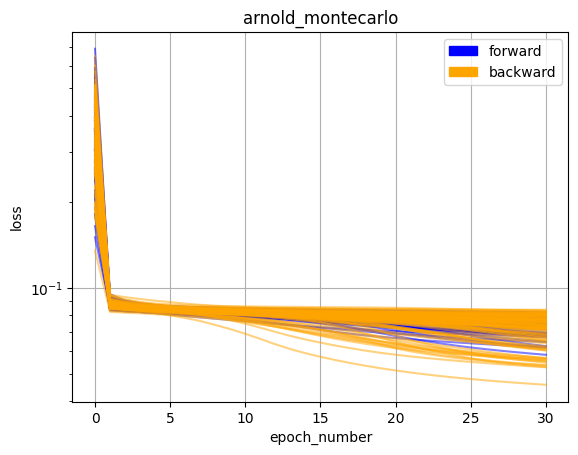

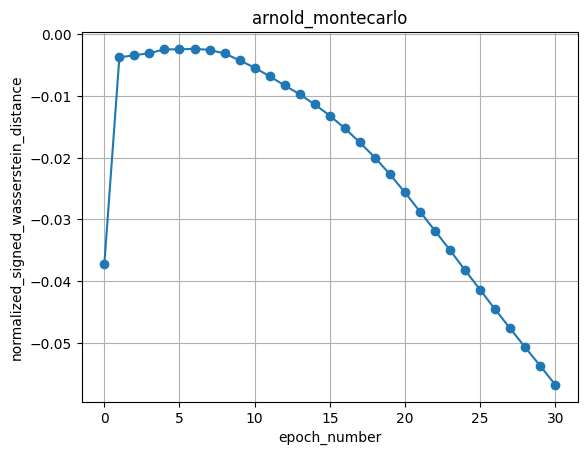

In [11]:
l = LossDistribution("20230626_distributions/arnold_montecarlo.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

## GARCH

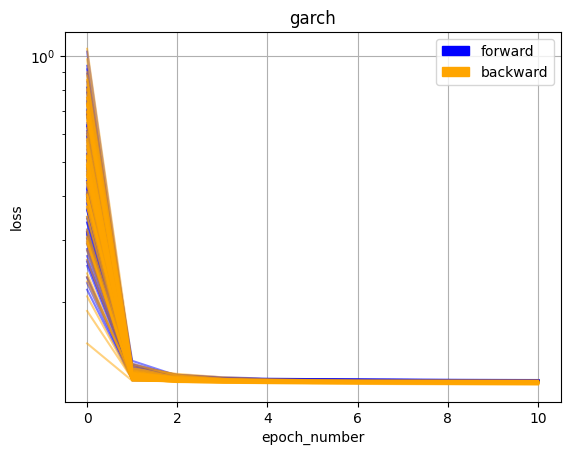

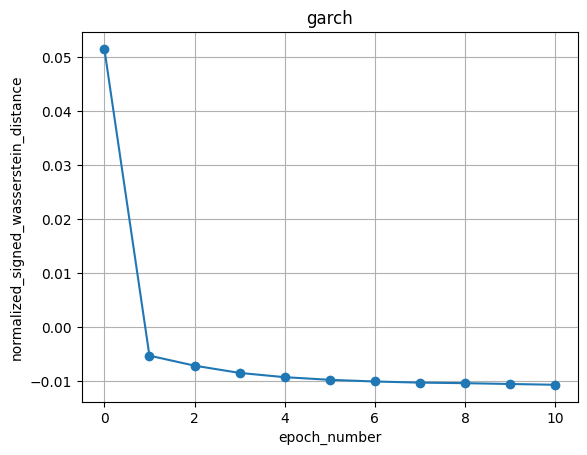

In [12]:
l = LossDistribution("20230626_distributions/garch.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

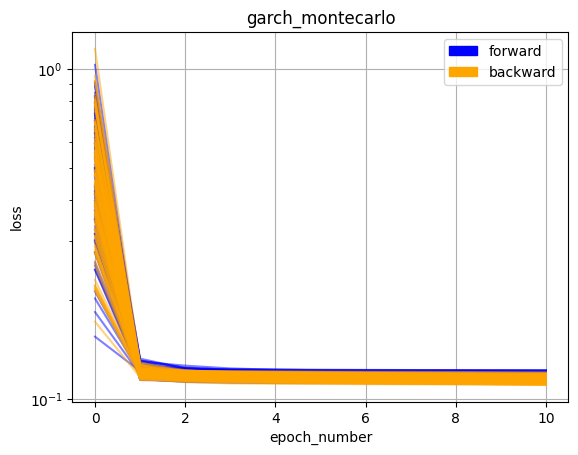

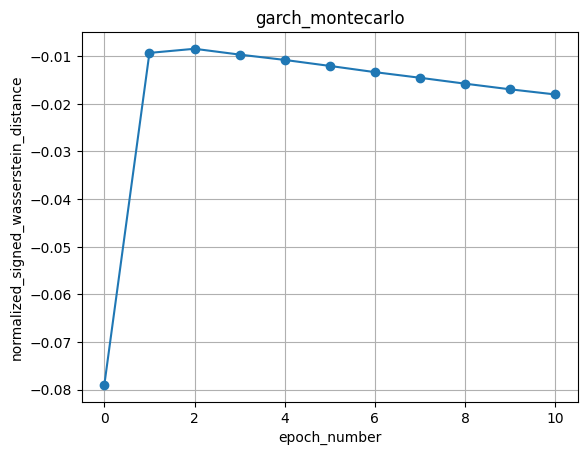

In [13]:
l = LossDistribution("20230626_distributions/garch_montecarlo.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()